### Relationship between S&P500 Earnings Yield, US Treasury and Merrill Lynch Corporate BBB Index yields. Are investors being compensated for additional risk they are taking in the equity market? 

Data Source: Nasdaq Data Link

Alternatively, replace S&P500 Earnings Yield with free cash flow yield because the earnings yield can and is obfuscated by adjusted EPS and stock-based compensation. Both data sets yield similar conclusions. 

#### Import Libraries

In [1]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd

import matplotlib.pyplot as plt # Plotting
import matplotlib.patches as mpatches
import matplotlib.dates as mdates # Styling dates
from matplotlib.dates import DateFormatter
from matplotlib import ticker
%matplotlib inline
import seaborn as sns # Plotting
import mplfinance as mpf # Matplotlib finance

import datetime as dt # For defining dates
import time
from datetime import timedelta, datetime
from dateutil.relativedelta import relativedelta

# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

#### Get dataframe from CSV, save dataframe to CSV

In [2]:
PATH = (r"C:/Users/User/Documents/Chartbook/SP500 earnings yield, 3m UST Yield, Baa yield/")
def get_df_from_csv(data_source):
    try:
        df = pd.read_csv(PATH + data_source + ".csv") # index_col='Date', parse_dates=True
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df

In [3]:
def save_df_to_csv(df, ticker):
    df.to_csv(PATH + ticker + ".csv")

#### Get data and return plot

In [4]:
# get data from csv and return dataframe for all data sets
BBB = get_df_from_csv('ML-BBBEY')
BBB['Date'] = pd.to_datetime(BBB.Date, format='%d/%m/%Y')
earnings_yield = get_df_from_csv('SP500 Earnings yield')
earnings_yield['Date'] = pd.to_datetime(earnings_yield.Date)
UST_yields = get_df_from_csv('USTREASURY-YIELD')
UST_yields['Date'] = pd.to_datetime(UST_yields.Date, format='%d/%m/%Y')

In [5]:
UST_yields

,Date,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
0,2023-02-16,4.66,4.80,4.84,4.98,4.99,4.62,4.35,4.06,3.98,3.86,4.05,3.92
1,2023-02-15,4.64,4.79,4.79,4.97,4.96,4.62,4.35,4.04,3.94,3.81,3.97,3.85
2,2023-02-14,4.63,4.78,4.80,4.98,4.99,4.60,4.32,4.00,3.90,3.77,3.94,3.81
3,2023-02-13,4.66,4.78,4.81,4.99,4.91,4.52,4.22,3.93,3.84,3.72,3.92,3.79
4,2023-02-10,4.66,4.77,4.79,4.89,4.89,4.50,4.19,3.93,3.86,3.74,3.96,3.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8284,1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
8285,1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
8286,1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
8287,1990-01-03,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04


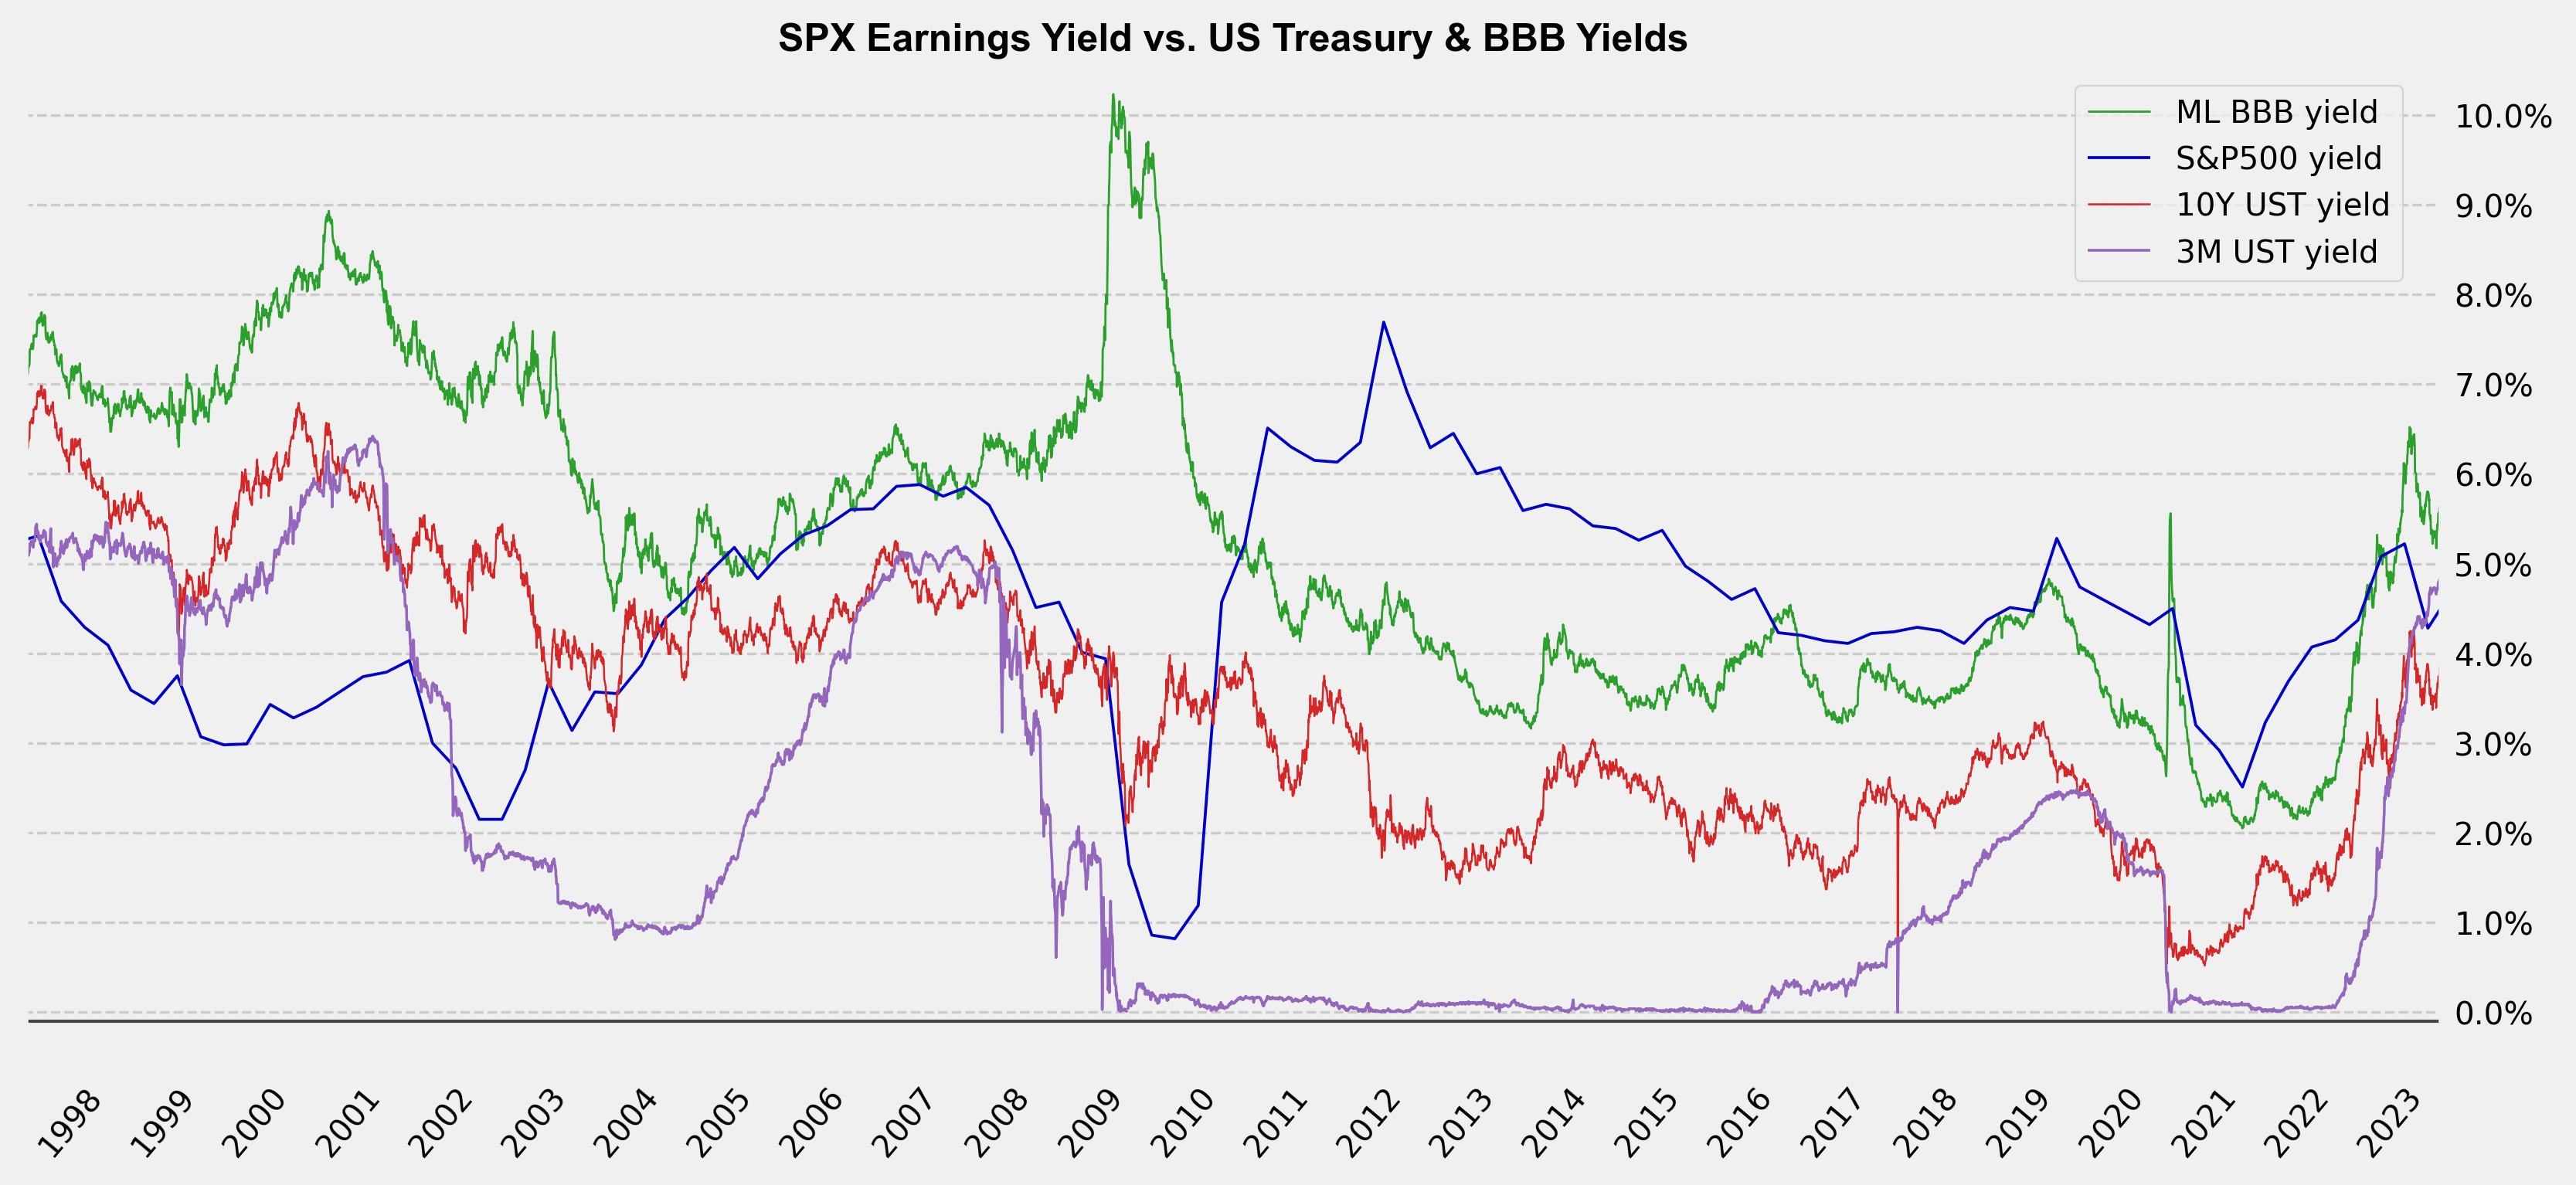

In [17]:
# create the plot figure
fig, ax = plt.subplots(figsize = (11, 5), dpi=300) # facecolor='white'
# ax.set_facecolor('white')
plt.rcParams['figure.constrained_layout.use'] = True # automatically adjusts and fit layout 
#plt.margins(0, 0.05) # manually fit x and y series inside plot area, or use autoscaling bellow. 
plt.autoscale(enable=None, axis="x", tight=True)

plt.style.use('fivethirtyeight') # setting grid style with seaborn

font = {'family': 'sans-serif',
        'name': 'arial',
        'color': 'black',
        'weight': 'bold',
        'size': 12,
        }

#plot data
ax.plot(BBB['Date'], BBB['BAMLC0A4CBBBEY'], c='tab:green', lw=0.675, alpha=1, label='ML BBB yield')
ax.plot(earnings_yield['Date'], earnings_yield['Value'], c='mediumblue', lw=0.9, alpha=1, label='S&P500 yield')
ax.plot(UST_yields['Date'], UST_yields['10 YR'], c='tab:red', lw=0.6, alpha=1, label='10Y UST yield')
ax.plot(UST_yields['Date'], UST_yields['3 MO'], c='tab:purple', lw=0.85, alpha=1, label='3M UST yield')
ax.set_xlim([dt.datetime(1997,1,31), dt.datetime(2023,2,28)]) # set x-axis view range 
ax.tick_params(axis='x', labelcolor='black', labelsize='x-small') # format tick style
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # format x-axis dates (%d-%m-%Y)
ax.xaxis.set_major_locator(mdates.YearLocator(1)) # x-axis tick label interval
# rotate and right-align x-axis labels so they don't crowd each other. which = major (select major ticks)
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=50, horizontalalignment='right')
ax.grid(which='major', linestyle='--', linewidth=0.8) # style grid
ax.xaxis.grid(None)

# set params for y-axis
ax.set_ylim(-0.64, 10.5) # set y-axis view range
ax.yaxis.tick_right() # ticks on right side of plot area 
ax.tick_params(axis='y', labelcolor='black', labelsize='x-small') # format tick style
ax.yaxis.set_major_locator(ticker.MultipleLocator(1)) # major tick position
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100)) # format tick label as percentage
# bbox_to_anchor : specific position of the legend (x, y, width, height)
ax.legend(fontsize='x-small', bbox_to_anchor=(0.99, 0, 0, 1))
ax.axhline(y = -0.1, color = 'black', linewidth = 1, alpha = .7) 
plt.title("SPX Earnings Yield vs. US Treasury & BBB Yields", loc='center', fontdict=font)

# show the plot
plt.show();


**Comment**: UST 3 month Bill is yielding as much as the S&P500 on current earnings.